# 1. FIFA.csv

In [63]:
import pandas as pan
import matplotlib.pyplot as pyp
import scipy.stats as st
import scipy.integrate as intg
import numpy as np

data = pan.read_csv('dataset_fifa.csv')
data

Name  Age          Nationality
0                  L. Messi   31            Argentina
1         Cristiano Ronaldo   33             Portugal
2                 Neymar Jr   26               Brazil
3                    De Gea   27                Spain
4              K. De Bruyne   27              Belgium
5                 E. Hazard   27              Belgium
6                 L. Modrić   32              Croatia
7                 L. Suárez   31              Uruguay
8              Sergio Ramos   32                Spain
9                  J. Oblak   25             Slovenia
10           R. Lewandowski   29               Poland
11                 T. Kroos   28              Germany
12                 D. Godín   32              Uruguay
13              David Silva   32                Spain
14                 N. Kanté   27               France
15                P. Dybala   24            Argentina
16                  H. Kane   24              England
17             A. Griezmann   27               France
18            M. ter Stegen   26              Germany
19              T. Courtois   26              Belgium
20          Sergio Busquets   29                Spain
21                E. Cavani   31              Uruguay
22                 M. Neuer   32              Germany
23                S. Agüero   30            Argentina
24             G. Chiellini   33                Italy
25                K. Mbappé   19               France
26                 M. Salah   26                Egypt
27                 Casemiro   26               Brazil
28             J. Rodríguez   26             Colombia
29               L. Insigne   27                Italy
...                     ...  ...                  ...
18177             R. Roache   18  Republic of Ireland
18178          L. Wahlstedt   18               Sweden
18179           J. Williams   17              England
18180              M. Hurst   22             Scotland
18181              C. Maher   17  Republic of Ireland
18182               Y. Góez   18             Colombia
18183         K. Pilkington   44              England
18184             D. Horton   18              England
18185              E. Tweed   19  Republic of Ireland
18186          Zhang Yufeng   20             China PR
18187             C. Ehlich   19              Germany
18188            L. Collins   17                Wales
18189            A. Kaltner   18              Germany
18190            L. Watkins   18              England
18191  J. Norville-Williams   18              England
18192             S. Squire   18              England
18193            N. Fuentes   18                Chile
18194              J. Milli   18                Italy
18195            S. Griffin   18  Republic of Ireland
18196           K. Fujikawa   19                Japan
18197            D. Holland   18  Republic of Ireland
18198            J. Livesey   18              England
18199          M. Baldisimo   18               Canada
18200              J. Young   18             Scotland
18201              D. Walsh   18  Republic of Ireland
18202          J. Lundstram   19              England
18203    N. Christoffersson   19               Sweden
18204             B. Worman   16              England
18205        D. Walker-Rice   17              England
18206             G. Nugent   16              England

[18207 rows x 3 columns]

In [2]:
data.describe()

Age
count  18207.000000
mean      25.122206
std        4.669943
min       16.000000
25%       21.000000
50%       25.000000
75%       28.000000
max       45.000000

#### Dari data diatas dapat diketahui kalau range age nya adalah 16-45

## 1.1 Visualisasi Data

### 1.1.1 Histogram

Text(0.5, 0, 'Rentang Umur')

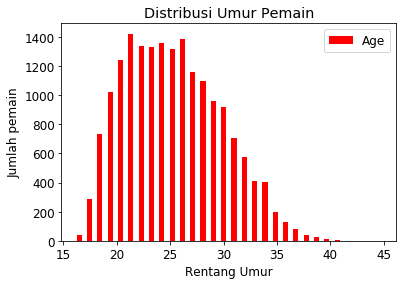

In [125]:
data.plot(kind = 'hist', bins = 30, rwidth = 0.5, color = "red")
pyp.title('Distribusi Umur Pemain')
pyp.ylabel('Jumlah pemain')
pyp.xlabel('Rentang Umur')

### 1.1.2 Boxplot

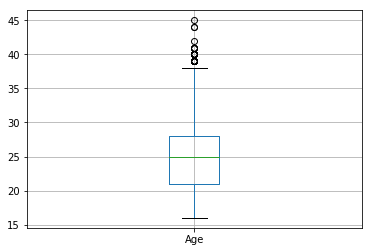

In [4]:
data.boxplot(column = ["Age"])

## 1.2. Statistical Description

### 1.2.1 Minimum Value

In [5]:
mini = data["Age"].min()
print("Umur pemain paling muda adalah", mini)

Umur pemain paling muda adalah 16


### 1.2.2 Maximum Value

In [6]:
maks = data["Age"].max()
print("Umur pemain paling tua adalah", maks)

Umur pemain paling tua adalah 45


### 1.2.3 Mean

In [7]:
mean = data["Age"].mean()
print("Umur rata-rata pemain adalah", mean)

Umur rata-rata pemain adalah 25.122205745043114


### 1.2.4 Mode

In [8]:
mode = data["Age"].mode()
print("Pemain dalam dataset kebanyakan berumur", mode)

Pemain dalam dataset kebanyakan berumur 0    21
dtype: int64


### 1.2.5 Median

In [9]:
median = data["Age"].median()
print("Median datanya adalah", median)

Median datanya adalah 25.0


### 1.2.6 Variance

In [10]:
varian = data["Age"].var()
print("Varian datanya adalah", varian)

Varian datanya adalah 21.808364946571594


### 1.2.7 Standard Deviation

In [11]:
dev = data["Age"].std()
print("Standar Deviasi dari datanya adalah", dev)

Standar Deviasi dari datanya adalah 4.66994271341433


### 1.2.8 Skewness

In [12]:
skew = data["Age"].skew()
print("Kecondongan datanya adalah", skew)

Kecondongan datanya adalah 0.3917641387687474


### 1.2.9 Kurtosis

In [13]:
kur = data["Age"].kurt()
print("Kurtosis datanya adalah", kur)

Kurtosis datanya adalah -0.4595135539307731


## 1.3 Fungsi distribusi peluang yang paling sesuai

### Langkah - langkah:

#### Menggunakan Best Fit Algorithm untuk mencoba semua kemungkinan distribusi

In [123]:
distNames = ["norm", "beta", "gamma", "expon", "chi2", "lognorm", "weibull_min", "weibull_max"]
distRes = []
params = {}
for distName in distNames:
    dist = getattr(st, distName)
    param = dist.fit(data["Age"])
    params[distName] = param
    D, p = st.kstest(data["Age"], distName, param)
    distRes.append((distName, p))
    print("p value for " + distName + " = " + str(p))

bestDist, bestP = (max(distRes, key=lambda item: item[1]))

print("Fungsi yang paling sesuai adalah " + str(bestDist))
print("Nilai P yang terbaik adalah " + str(bestP))
print("Parameter untuk fungsi yang paling sesuai " + str(params[bestDist]))

p value for norm = 4.313347009522603e-109
p value for beta = 7.05360508883961e-41
p value for gamma = 9.146540994950853e-72
p value for expon = 0.0
p value for chi2 = 0.0
p value for lognorm = 1.051449996618078e-73
p value for weibull_min = 0.0
p value for weibull_max = 0.0
Fungsi yang paling sesuai adalah beta
Nilai P yang terbaik adalah 7.05360508883961e-41
Parameter untuk fungsi yang paling sesuai (2.485160112120321, 5.358773760119705, 15.649739615660838, 29.86087420987997)


#### Beta adalah fungsi distribusi yang paling sesuai, berikut adalah gambarnya

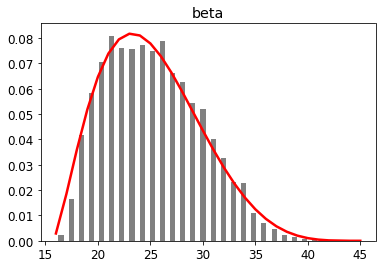

In [126]:
a,b,loc,scale = params[bestDist]
pyp.rcParams.update()
beta = st.beta(a,b,loc,scale)
h = sorted(np.array(data["Age"]))
betaPdf = beta.pdf(h)
pyp.plot(h,betaPdf,linewidth = 2.5,color = "red")
pyp.hist(data["Age"], density = 1, rwidth = 0.5, bins = 30, color = "grey")
pyp.title(bestDist)
pyp.show()

## 1.4 Pertanyaan

In [119]:
bet = st.beta(a,b,loc,scale)

def jawab(x, func = bet) :
    prob, err = intg.quad(func.pdf, -np.inf, x)
    return prob, err

### Umur kurang dari 22 tahun

In [130]:
prob, err = jawab(22)

print("Probabilitas yang berumur dibawah 22 tahun adalah {:.2f}".format(prob))
print("Dengan error {:.9f}".format(err))

answ = round(prob*1000)
print("Jumlah pemain yang  {}".format(answ))

Probabilitas yang berumur dibawah 22 tahun adalah 0.29
Dengan error 0.000000009
Jumlah = 287


### Berumur lebih dari 40 tahun

In [129]:
prob, err = jawab(40)

prob = 1 - prob

print("Probabilitas yang berumur diatas 44 tahun adalah {:.3f}".format(prob))
print("Dengan error {:.9f}".format(err))

answ = round(prob*1000)
print("Jumlah = {}".format(answ))

Probabilitas yang berumur diatas 44 tahun adalah 0.001
Dengan error 0.000000006
Jumlah = 1


# 2. ATHLETES.CSV

In [75]:
import pandas as pan
import matplotlib.pyplot as pyp
import scipy.stats as st
import scipy
from scipy.stats import sem, t
from scipy import mean
import numpy as np

data = pan.read_csv('dataset_athletes.csv')
data

Name  Medal
0                                             A Dijiang      0
1                                              A Lamusi      0
2                              A. Aanantha Sambu Mayavo      0
3                                       A. Abdul Razzak      0
4                                               A. Brun      0
5                                            A. Buydens      0
6                                        A. Charles Six      0
7                                          A. Christory      0
8                                             A. Darnis      0
9                                         A. Duponcheel      0
10                                           A. E. Page      0
11                                        A. G. Chagale      0
12                       A. Germaine Golding (Regnier-)      0
13                                           A. Godinat      0
14                                    A. Hurtado Vargas      0
15                                     A. Hussain Ahmed      0
16                                       A. J. J. Fridt      0
17              A. J. Tyronne Benildus "Benny" Fernando      0
18                                          A. Kordonis      0
19                                            A. Laffen      0
20                                        A. Lafontaine      0
21                                    A. Lambrecht, Jr.      0
22                                         A. O. Pinner      0
23                                         A. Papadakis      0
24                                           A. Porcher      0
25                                           A. Priftis      0
26                                             A. Roger      0
27                                         A. S. Harley      0
28                                    A. Sattar Basheer      0
29                                           A. Schmitt      0
...                                                 ...    ...
134701                            Isabelle Regina Werth     10
134702                                     Marit Bjrgen     10
134703                      Polina Hryhorivna Astakhova     10
134704                         Raisa Petrovna Smetanina     10
134705                      Raymond Clarence "Ray" Ewry     10
134706                                Stefania Belmondo     10
134707                    Vitaly Venediktovich Shcherbo     10
134708                                        Yang Yang     10
134709                        gnes Keleti-Srkny (Klein)     10
134710                    Aleksandr Vladimirovich Popov     11
134711                             Carl Townsend Osburn     11
134712                                Mark Andrew Spitz     11
134713                   Matthew Nicholas "Matt" Biondi     11
134714                        Viktor Ivanovych Chukarin     11
134715                           Vra slavsk (-Odloilov)     11
134716                          Aleksey Yuryevich Nemov     12
134717                           Birgit Fischer-Schmidt     12
134718             Dara Grace Torres (-Hoffman, -Minas)     12
134719  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)     12
134720                    Natalie Anne Coughlin (-Hall)     12
134721                             Paavo Johannes Nurmi     12
134722                               Ryan Steven Lochte     12
134723                                       Sawao Kato     12
134724                      Borys Anfiyanovych Shakhlin     13
134725                              Edoardo Mangiarotti     13
134726                              Ole Einar Bjrndalen     13
134727                                      Takashi Ono     13
134728                     Nikolay Yefimovich Andrianov     15
134729               Larysa Semenivna Latynina (Diriy-)     18
134730                          Michael Fred Phelps, II     28

[134731 rows x 2 columns]

In [2]:
data.describe()

Medal
count  134731.000000
mean        0.295277
std         0.724716
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        28.000000

## 2.1 Visualisasi Data

### 2.1.1 Histogram

Text(0.5, 0, 'Rentang Medali')

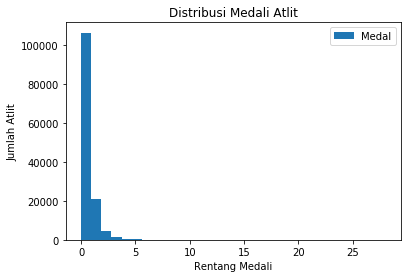

In [3]:
data.plot(kind = 'hist', bins = 30)
pyp.title('Distribusi Medali Atlit')
pyp.ylabel('Jumlah Atlit')
pyp.xlabel('Rentang Medali')

### 2.1.2 Boxplot

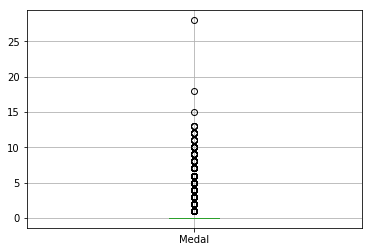

In [4]:
data.boxplot(column = ["Medal"])

## 2.2 Statistical Description

### 2.2.1 Minimum Value

In [5]:
mini = data["Medal"].min()
print("Jumlah medali minimum", mini)

Jumlah medali minimum 0


### 2.2.2 Maximum Value

In [6]:
maks = data["Medal"].max()
print("Jumlah medali maksimum", maks)

Jumlah medali maksimum 28


### 2.2.3 Mean

In [7]:
mean = data["Medal"].mean()
print("Jumlah rata-rata medali yang dimiliki atlit adalah", mean)

Jumlah rata-rata medali yang dimiliki atlit adalah 0.2952772561622789


### 2.2.4 Mode

In [8]:
mode = data["Medal"].mode()[0]
print("Kebanyakan atlit memiliki medali sebanyak", mode)

Kebanyakan atlit memiliki medali sebanyak 0


### 2.2.5 Median

In [9]:
median = data["Medal"].median()
print("Median datanya adalah", median)

Median datanya adalah 0.0


### 2.2.6 Variance

In [10]:
varian = data["Medal"].var()
print("Varian datanya adalah", varian)

Varian datanya adalah 0.5252132778008305


### 2.2.7 Standard Deviation

In [11]:
dev = data["Medal"].std()
print("Standar Deviasi dari datanya adalah", dev)

Standar Deviasi dari datanya adalah 0.724715998030146


### 2.2.8 Skewness

In [12]:
skew = data["Medal"].skew()
print("Kecondongan datanya adalah", skew)

Kecondongan datanya adalah 4.8199987845312


### 2.2.9 Kurtosis

In [13]:
kur = data["Medal"].kurt()
print("Kurtosis datanya adalah", kur)

Kurtosis datanya adalah 51.562525836059855


## 2.3 Fungsi distribusi yang paling sesuai

### Menggunakan Best Fit Alogrithm untuk mencoba semua kemungkinan fungsi distribusi

In [14]:
dist_names = ["norm", "beta", "gamma", "expon", "chi2", "lognorm", "weibull_min", "weibull_max"]
dist_results = []
params = {}
for dist_name in dist_names:
    dist = getattr(st, dist_name)
    param = dist.fit(data["Medal"])

    params[dist_name] = param
    D, p = st.kstest(data["Medal"], dist_name, args=param)
    print("p value for "+dist_name+" = "+str(p))
    dist_results.append((dist_name, p))

best_dist, best_p = (max(dist_results, key=lambda item: item[1]))

p value for norm = 0.0


F:\Anaconda\lib\site-packages\scipy\stats\_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
F:\Anaconda\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


p value for beta = 0.0
p value for gamma = 0.0
p value for expon = 0.0
p value for chi2 = 0.0
p value for lognorm = 0.0
p value for weibull_min = 0.0
p value for weibull_max = 0.0


#### Karena semuanya bernilai 0 maka harus menggunakan cara lain yaitu dengan melihat secara langsung visualisasi dari masing-masing distribusi

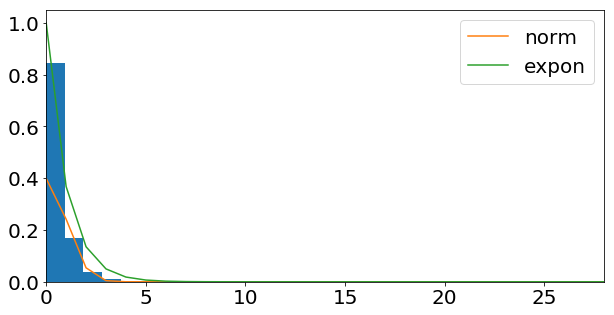

In [47]:
size = len(data)
x = scipy.arange(size)
pyp.figure(figsize=(10,5))
pyp.rcParams.update()
histogram = pyp.hist(data["Medal"], bins = 30, density = True, rwidth = 1)

distNames = ["norm", "expon"]

for distName in distNames:
    dist = getattr(scipy.stats, distName)
    param = dist.fit(data["Medal"])
    pdf_fitted = dist.pdf(x, *param[:-2])
    pyp.plot(pdf_fitted, label=distName)
    pyp.xlim(0,28)
pyp.legend(loc='upper right')
pyp.show()

#### Berdasarkan gambar di atas eksponen adalah fungsi distribusi yang paling sesuai

## 2.4 Pertanyaan

### Peluang Y meraih

### 2.4.1 Tepat 0 medali

In [50]:
data0 = data[data["Medal"] == 0]
print("Peluangnya adalah", data0["Name"].count()/134731)

Peluangnya adalah 0.7906792052311643


### 2.4.2 Lebih dari 10 medali

In [51]:
data10 = data[data["Medal"] > 10]
print("Peluangnya adalah", data10["Name"].count()/134731)

Peluangnya adalah 0.00015586613325812174


### 2.4.3 Tepat 3 medali

In [53]:
data3 = data[data["Medal"] == 3]
print("Peluangnya adalah", data3["Name"].count()/134731)

Peluangnya adalah{.3f} 0.01027974259821422


### 2.4.4 1 atau 5 medali

In [63]:
data15 = data[(data["Medal"] == 5) | (data["Medal"] == 1)]
print("Peluangnya adalah", data15["Name"].count()/134731)

Peluangnya adalah 0.1588424341836697


### Confidence interval 95%

In [86]:
data5 = data["Medal"].tolist()
ci = 0.95
error = 
rata = mean(data5)
jmldata = len(data5)
error = error*t.ppf((1+ci)/2, jmldata-1)

print("Confidence interval 95%", rata-error, "< mean <", rata + error)

Confidence interval 95% 0.29140747795632177 < mean < 0.29914703436823603


# 3.Black Friday Dataset

In [1]:
import pandas as pd
import scipy
import scipy.integrate as integ
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
data = pd.read_csv('black_friday.csv', header = None)
data.head()

0
0   8370
1  15200
2   1422
3   1057
4   7969

## Data Visualizations:

### Histogram

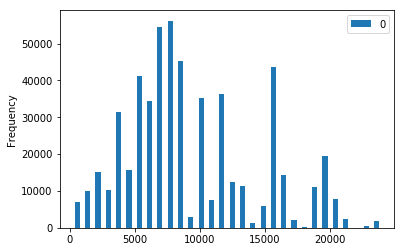

In [2]:
data.plot(kind = 'hist', bins = 30, rwidth = 0.5)

### Box Plot

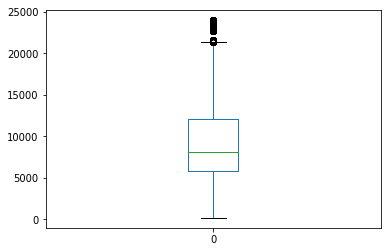

In [3]:
data.plot(kind = 'box')

## Statisticals Descriptions
data.describe() shows the data's min/max values, mean, standard deviation (std), median (noted by 50 percentile), and count.

In [4]:
data.describe()

0
count  537577.000000
mean     9333.859853
std      4981.022133
min       185.000000
25%      5866.000000
50%      8062.000000
75%     12073.000000
max     23961.000000

In [5]:
print('Mode:')
data.mode()

Mode:


0
0  6855

In [6]:
print('Variance:')
data.var()

Variance:


0    2.481058e+07
dtype: float64

In [7]:
print('Skewness: ')
data.skew()

Skewness: 


0    0.62428
dtype: float64

In [8]:
print('Kurtosis:')
data.kurtosis()

Kurtosis:


0   -0.343121
dtype: float64

## Probability Density Function:

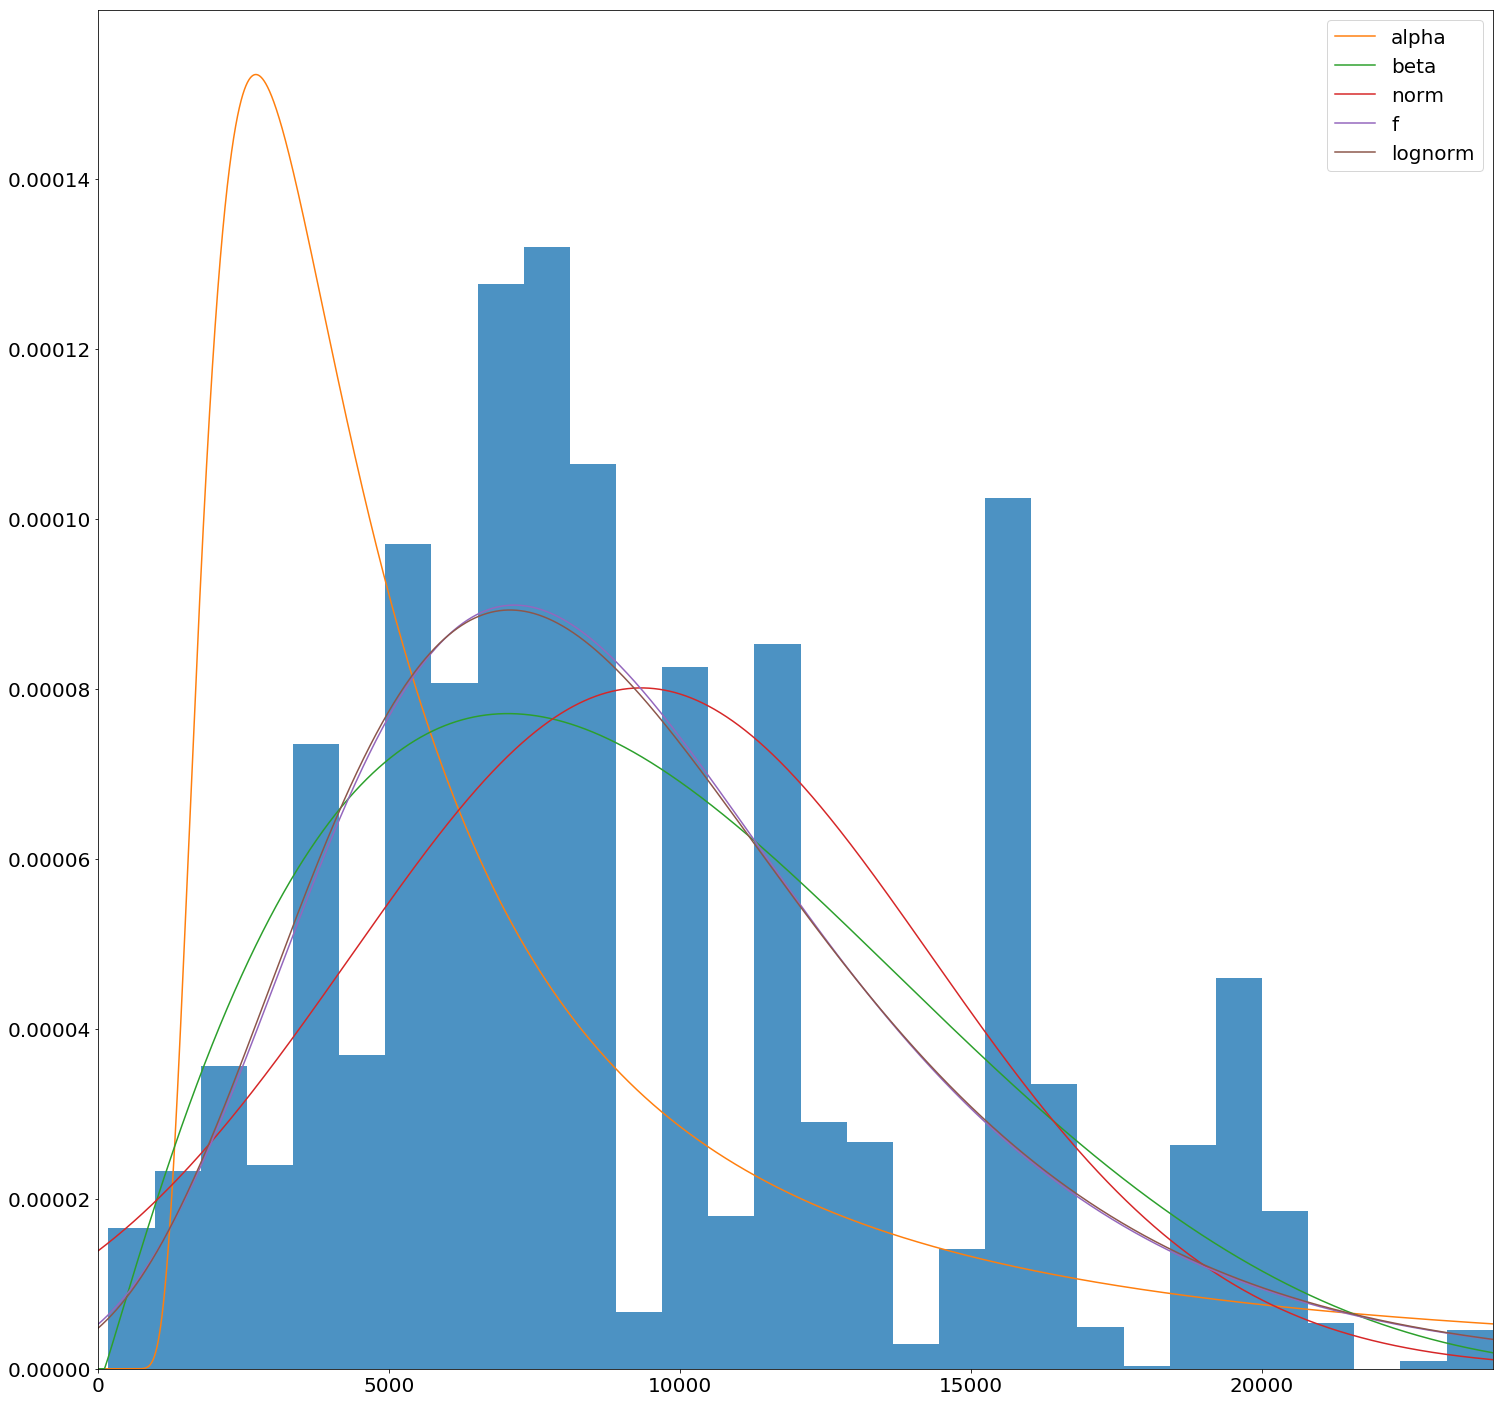

In [10]:
size = len(data)
x = scipy.arange(size) #create X axis
plt.figure(figsize=(25,25)) #create plot figure
plt.rcParams.update({'font.size': 20}) #update font
histogram = plt.hist(data[0], bins=30, normed = True, alpha = 0.8) #Plot histogram

#Distributions to be compared (determined heuristically)
dist_names = ["alpha","beta","norm","f", "lognorm"]

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(data[0])
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,23961)
plt.legend(loc='upper right')
plt.show()

Distribusi peluang yang dipakai adalah distribusi lognorm karena dapat dilihat yang paling mirip adalah lognorm

## Jawaban Pertanyaan

### Miskin (total pembelian kurang dari 1000 dolar)

In [11]:
a,b,c = st.lognorm.fit(data[0])
fun = st.lognorm(a,b,c)
p, err = integ.quad(fun.pdf,-np.inf,1000)

print('Dari 250 orang jumlah yang tergolong miskin adalah ',round(p*250))

Dari 250 orang jumlah yang tergolong miskin adalah  3


### Kaya (total pembelian lebih dari 10000 dolar)

In [13]:
a,b,c = st.lognorm.fit(data[0])
fun = st.lognorm(a,b,c)
p, err = integ.quad(fun.pdf,-np.inf,10000)

print('Dari 250 orang jumlah yang tergolong kaya adalah ',round((1-p)*250))

Dari 250 orang jumlah yang tergolong miskin adalah  96


### Crazy Rich (total pembelian lebih dari 20000 dolar)

In [14]:
a,b,c = st.lognorm.fit(data[0])
fun = st.lognorm(a,b,c)
p, err = integ.quad(fun.pdf,-np.inf,20000)

print('Dari 250 orang jumlah yang tergolong crazy rich adalah ',round((1-p)*250))

Dari 250 orang jumlah yang tergolong crazy rich adalah  9


### Galaxy Fold (total pembelian di antara 1980–2000 dolar inklusif)

In [16]:
a,b,c = st.lognorm.fit(data[0])
fun = st.lognorm(a,b,c)
p, err = integ.quad(fun.pdf,1980,2000)

print('Dari 1000 orang jumlah yang dapat membeli Galaxy Fold adalah ',round(p*1000))

Dari 1000 orang jumlah yang dapat membeli Galaxy Fold adalah  1


### MacBook Pro 2018 Touch Bar 256GB + iPhone XR + AirPods 2 (total pembelian di antara 2707–2897 dolar inklusif)

In [18]:
a,b,c = st.lognorm.fit(data[0])
fun = st.lognorm(a,b,c)
p, err = integ.quad(fun.pdf,2707,2897)

print('Dari 1000 orang jumlah yang dapat membeli Galaxy Fold adalah ',round(p*1000))

Dari 1000 orang jumlah yang dapat membeli Galaxy Fold adalah  8


# 4. Crypto Database

In [1]:
import pandas as pd
import scipy
import scipy.integrate as integ
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
data = pd.read_csv('crypto.csv', header = None)
data.head()

0
0  0.000015
1  0.000023
2  0.000033
3  0.000037
4  0.000037

## Data Visualizations:

### Histogram

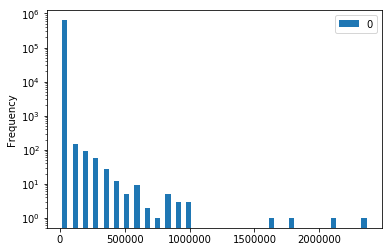

In [2]:
data.plot(kind = 'hist', bins = 30, log = True, rwidth = 0.5)

### Box Plot

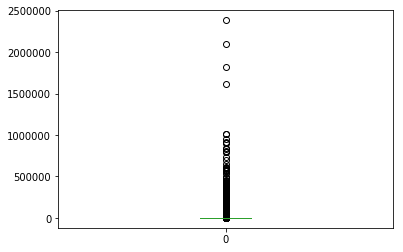

In [3]:
data.plot(kind = 'box')

## Statisticals Descriptions
data.describe() shows the data's min/max values, mean, standard deviation (std), median (noted by 50 percentile), and count.

In [4]:
data.describe()

0
count  6.322180e+05
mean   2.030181e+02
std    8.678734e+03
min    2.925000e-09
25%    8.070000e-04
50%    9.733500e-03
75%    1.198202e-01
max    2.383502e+06

In [5]:
print('Mode:')
data.mode()

Mode:


0
0  0.000002

In [6]:
print('Variance:')
data.var()

Variance:


0    7.532042e+07
dtype: float64

In [7]:
print('Skewness: ')
data.skew()

Skewness: 


0    118.239608
dtype: float64

In [8]:
print('Kurtosis:')
data.kurtosis()

Kurtosis:


0    22297.470843
dtype: float64

## Probability Density Function:

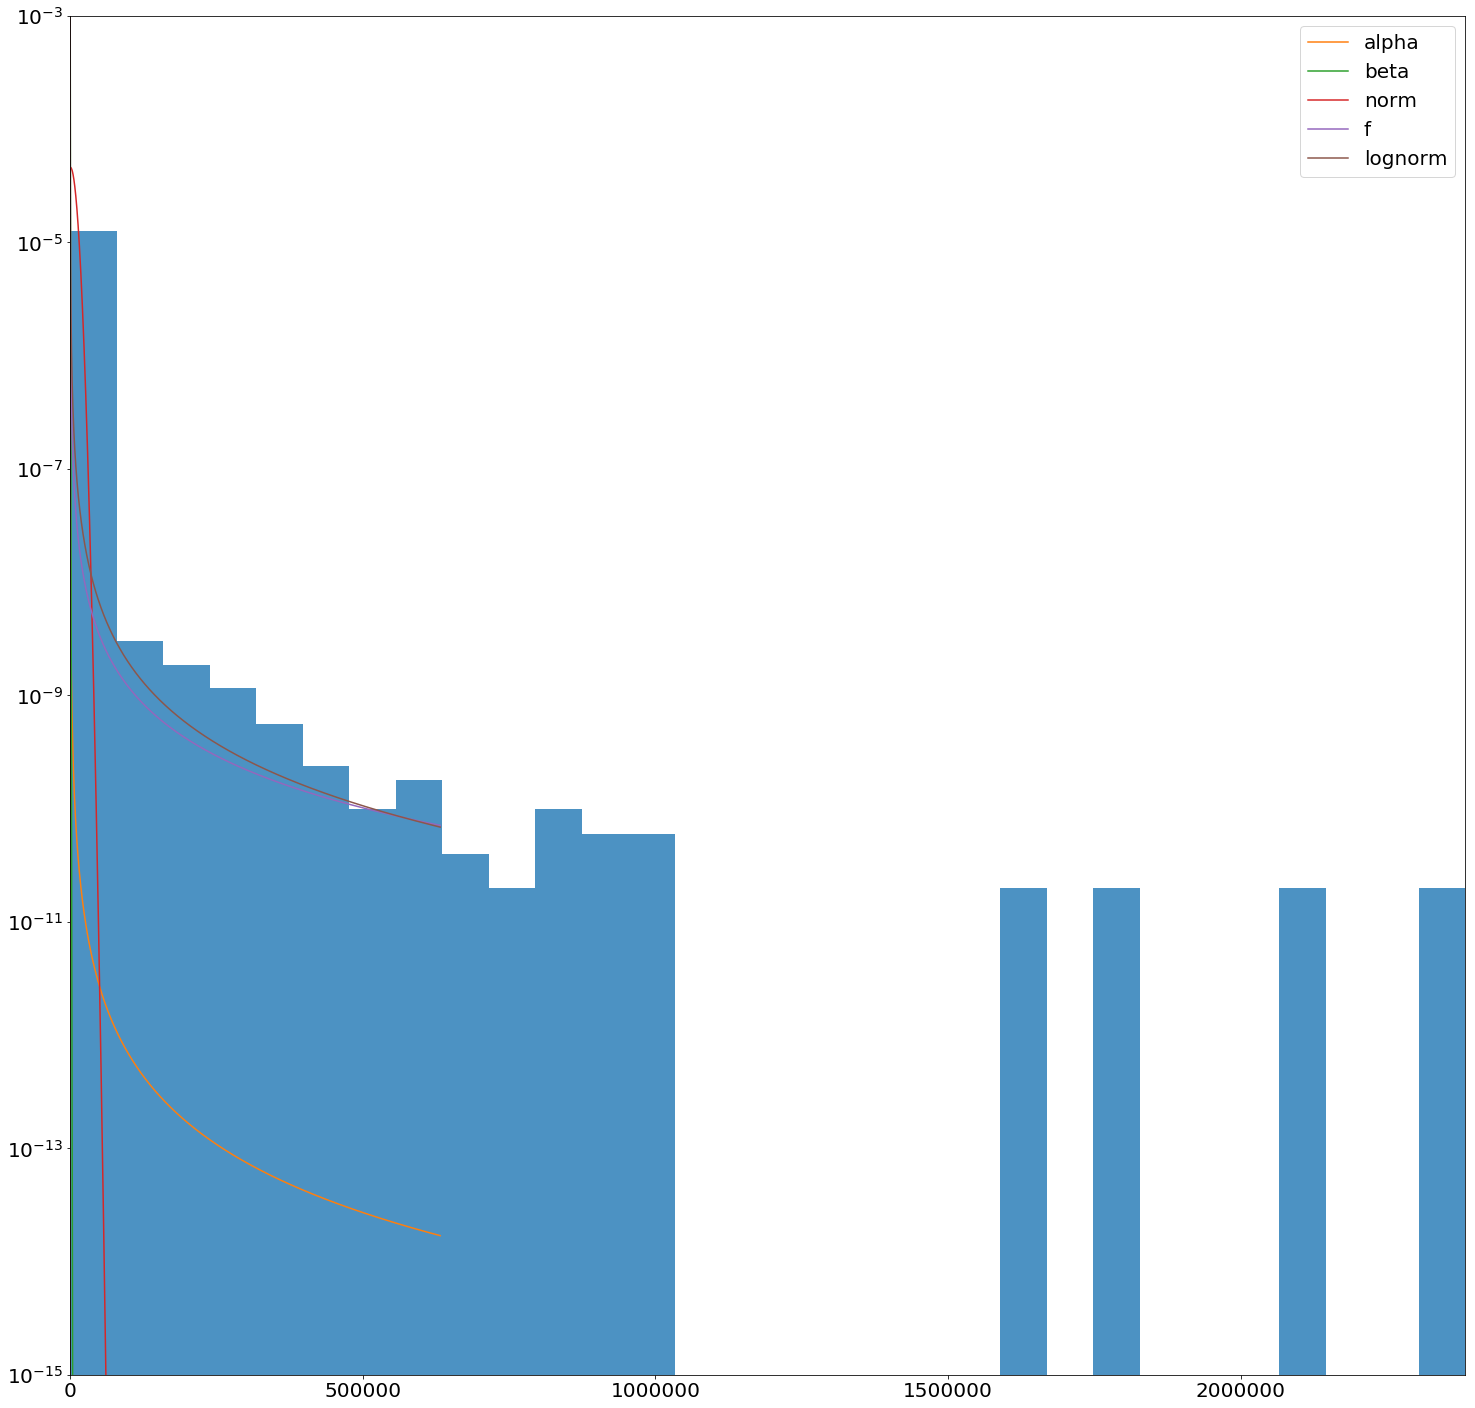

In [14]:
size = len(data)
x = scipy.arange(size) #create X axis
plt.figure(figsize=(25,25)) #create plot figure
plt.rcParams.update({'font.size': 20}) #update font
histogram = plt.hist(data[0], bins=30, normed = True, log = True, alpha = 0.8) #Plot histogram

#Distributions to be compared (determined heuristically)
dist_names = ["alpha","beta","norm","f", "lognorm"]

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(data[0])
    pdf_fitted = dist.pdf(x, *param[:-2], loc=param[-2], scale=param[-1])
    plt.plot(pdf_fitted, label=dist_name)
    plt.xlim(0,2383502)
    plt.ylim(10e-16,10e-4)
plt.legend(loc='upper right')
plt.show()

## Jawaban Pertanyaan

### Kurang dari 0.177013

In [21]:
a,b,c = st.lognorm.fit(data[0])
fun = st.lognorm(a,b,c)
p, err = integ.quad(fun.pdf,-np.inf,0.177013)

print('Dari 1000 data harga maka akan ada ',round(p*1000), ' yang harganya dibawah 0.177013')

Dari 1000 data harga maka akan ada  699  yang harganya dibawah 0.177013


### Lebih dari 177.013

In [22]:
a,b,c = st.lognorm.fit(data[0])
fun = st.lognorm(a,b,c)
p, err = integ.quad(fun.pdf,-np.inf,177.013)

print('Dari 1000 data harga maka akan ada ',round((1-p)*1000), ' yang harganya dibawah 0.177013')

Dari 1000 data harga maka akan ada  17  yang harganya dibawah 0.177013


/Users/abiyyuismunandar/Library/Python/3.7/lib/python/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


### Peluang harga lebih dari 0.013

In [25]:
a,b,c = st.lognorm.fit(data[0])
fun = st.lognorm(a,b,c)
p, err = integ.quad(fun.pdf,-np.inf,0.013)

print('Jika ada cryptocurrency baru maka peluang harganya 0.013 adalah',round((1-p),2))

Jika ada cryptocurrency baru maka peluang harganya 0.013 adalah 0.49


### Peluang harga kurang dari 17.7

In [27]:
a,b,c = st.lognorm.fit(data[0])
fun = st.lognorm(a,b,c)
p, err = integ.quad(fun.pdf,-np.inf,17.7)

print('Jika ada cryptocurrency baru maka peluang harganya 17.7 adalah',round((p),2))

Jika ada cryptocurrency baru maka peluang harganya 17.7 adalah 0.95
